In [1]:
## Importing Libs 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV, TimeSeriesSplit

from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV ,StratifiedKFold
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler ,StandardScaler ,RobustScaler
from sklearn.feature_selection import f_classif
import os

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import plotly.graph_objects as go
 

def from_quartile_idx(df,quartile,target):
    ## get the index of the quatile in df when creating train/test splits

    counter = 0

    eighty = np.round(df[target].value_counts()[1] * quartile)

    position = 0

    for idx, i in enumerate(df[target]):
        if i == 1:
            counter += 1 

        if counter == eighty:
            position = idx
            print(position)
            break 
    
    return position

def plotlines(data):
    fig = px.line(data_frame=data, x='CrossValidation', y='Accurancy', color='Model', 
                  title="Model Performance", labels={'Accurancy': 'Accuracy'}, 
                  template="plotly_white", markers=True)

    fig.update_traces(mode='lines+markers')
    fig.update_layout(autosize=False, width=1500, height=600)
    fig.show()




def evaluate_model(Ytest, predictions, pos_class, neg_class):
    test_precision = precision_score(Ytest, predictions, pos_label=pos_class)
    test_recall = recall_score(Ytest, predictions, pos_label=pos_class)
    test_f1 = f1_score(Ytest, predictions, pos_label=pos_class)
    test_accuracy = accuracy_score(Ytest, predictions)

    # Get the confusion matrix
    confusion = confusion_matrix(Ytest, predictions, labels=[pos_class, neg_class])

    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)

    # Plotting the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=[pos_class, neg_class], 
                yticklabels=[pos_class, neg_class])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    
    plt.title('Confusion Matrix')
    plt.show()

def upsample(df, target_column):
    """
    Up-sample the minority class of a DataFrame based on the target column.

    Parameters:
    - df: DataFrame
    - target_column: string, the name of the target column

    Returns:
    - DataFrame with balanced classes
    """
    # Split the dataframe by class
    df_minority = df[df[target_column] == df[target_column].value_counts().idxmin()]
    df_majority = df[df[target_column] != df[target_column].value_counts().idxmin()]

    # Upsample the minority class
    df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

    # Concatenate the majority class dataframe with the upsampled minority class dataframe
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    
    return df_upsampled



I need python version 3.9.17 in order to run 
import pymssql

In [8]:
# from Preprocessing_Application import DataPreprocessor

# server = 'reporting-db.nystartfinans.net'
# database = 'reporting-db'
# username = 'Andreas'
# password = 'nCq8Sg@1lYnd(E'

# path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Behaviour-ScoreCard-DATA-223-/1. BSD.sql"

# preprocessor = DataPreprocessor(server, database, username, password) 


# df = preprocessor.fetch_data_from_sql(path)


In [2]:





# # Read the CSV file.
df = pd.read_csv('BSC_mani.csv', skiprows=0)

pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])
df =df[df.DisbursedDate >= '2017-01-01' ]

#df =df[df.MOB < 20]



In [3]:
df

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
1837,5020169,2020-05-31,24,2018-05-29,0,0.0,0.0,0,0,0,0,0,0,0.052000,0,0,1,0,NaN,0
3755,5027321,2018-10-31,9,2018-01-09,0,0.0,0.0,0,0,0,0,0,0,0.096607,1,1,1,0,4.595843,0
3840,5027669,2022-06-30,46,2018-08-16,0,0.0,0.0,0,0,0,0,0,0,0.028300,0,1,1,0,4.595843,0
4065,5028501,2022-07-31,49,2018-06-11,1,0.0,0.0,0,0,0,0,0,0,0.028470,0,0,1,0,NaN,0
8252,5043005,2020-10-31,33,2018-01-29,1,269.0,397.0,0,1,1,0,0,1,0.152784,1,2,3,0,3.126808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,7772395,2022-10-31,4,2022-06-30,1,0.0,0.0,0,0,0,0,0,0,0.027863,1,1,1,0,1.877308,0
1824,7772635,2022-11-30,4,2022-07-01,0,0.0,0.0,0,0,0,0,0,0,0.080673,1,1,1,0,NaN,0
1875,7772825,2022-11-30,5,2022-06-30,0,0.0,0.0,0,0,0,0,0,0,0.122270,0,0,0,0,3.654435,1
1912,7772924,2022-12-31,5,2022-07-01,0,0.0,0.0,0,0,0,0,0,0,0.039616,0,0,0,0,3.654435,0


In [4]:
#df = df.drop(columns=['Ever30In12Months','WorstDelinquency12M','TimeSince30','TimeSince60','Ever60In12Months','P_calibrated','MOB']) # ,'MOB','TimeSince60',	'Ever60In6Months'      ,'Ever60In12Months'      ,'WorstDelinquency6M','TimeSince30'

df = df.drop(columns=['Ever30In12Months','Ever60In12Months','WorstDelinquency12M','Ever60','TimeSince30','TimeSince60','P_calibrated','MOB','WorstDelinquency','Ever30','Ever60In6Months']) # ,'MOB','TimeSince60',	'Ever60In6Months'      ,'Ever60In12Months'      ,'WorstDelinquency6M','TimeSince30'

In [5]:
print(max(df.SnapshotDate))

df

2022-12-31


,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M
1837,5020169,2020-05-31,2018-05-29,0,0,0,0,NaN,0
3755,5027321,2018-10-31,2018-01-09,0,0,1,0,4.595843,0
3840,5027669,2022-06-30,2018-08-16,0,0,0,0,4.595843,0
4065,5028501,2022-07-31,2018-06-11,1,0,0,0,NaN,0
8252,5043005,2020-10-31,2018-01-29,1,0,1,0,3.126808,0
...,...,...,...,...,...,...,...,...,...
1761,7772395,2022-10-31,2022-06-30,1,0,1,0,1.877308,0
1824,7772635,2022-11-30,2022-07-01,0,0,1,0,NaN,0
1875,7772825,2022-11-30,2022-06-30,0,0,0,0,3.654435,1
1912,7772924,2022-12-31,2022-07-01,0,0,0,0,3.654435,0


## Data Split

In [6]:

#########################
#df = toKeep.copy()

quartile1 = 0.7 
quartile2 = 0.85 
 

position1 = from_quartile_idx(df,quartile1,'Ever90_12M')
position2 = from_quartile_idx(df,quartile2,'Ever90_12M')



# Split the data
train, test , val = df.iloc[:position1], df.iloc[position1:position2] ,df.iloc[position2:]

toPlotPDtrain = train.copy()
toPlotPDtrain = val.copy()
toPlotPDtest = test.copy()


print(len(train))
print(len(val))
print(len(test))


7159
8174
7159
1007
1015


In [7]:


target_column = 'Ever90_12M'

# Split the dataframe by class
df_minority = train[train[target_column] == train[target_column].value_counts().idxmin()].copy()
df_majority = train[train[target_column] != train[target_column].value_counts().idxmax()].copy()


df_minority['DisbursedDate'] = pd.to_datetime(df_minority['DisbursedDate'])

# Extract the year and month for each row in the minority dataframe
df_minority['YearMonth'] = df_minority['DisbursedDate'].dt.to_period('M')

# Get the month with the maximum count of the minority class
max_count = df_minority['YearMonth'].value_counts().max()


def replicate_to_length(df, desired_length):
    """
    Replicates the dataframe until it reaches the desired length.
    
    Parameters:
    - df: DataFrame
    - desired_length: integer, the desired number of rows
    
    Returns:
    - A DataFrame that is replicated to the specified length
    """
    n_full_copies = desired_length // len(df)
    remaining_rows = desired_length % len(df)
    
    full_copies_df = pd.concat([df] * n_full_copies, ignore_index=True)
    partial_df = df.iloc[:remaining_rows].copy() if remaining_rows else pd.DataFrame(columns=df.columns)
    
    return pd.concat([full_copies_df, partial_df], ignore_index=True)

# Initialize an empty DataFrame to hold the upsampled minority data
expanded_df = pd.DataFrame()

unique_months = df_minority['YearMonth'].unique()

for month in unique_months:
    monthly_data = df_minority[df_minority['YearMonth'] == month].copy()
    monthly_upsampled = replicate_to_length(monthly_data, 170)
    expanded_df = pd.concat([expanded_df, monthly_upsampled], ignore_index=True)
    
# After the loop, you'll have an expanded_df that has each month's data upsampled to 50 rows.


/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_3209/2011053297.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([full_copies_df, partial_df], ignore_index=True)
/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_3209/2011053297.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([full_copies_df, partial_df], ignore_index=True)
/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_3209/2011053297.py:34: FutureWarning: The behavior of

In [8]:

fordist = expanded_df.copy()

fordist = fordist[fordist.Ever90_12M == 1]

# Set the index of df to 'ReceivedDate'
fordist.set_index('DisbursedDate', inplace=True)


# Get the monthly counts
monthly_counts1 = fordist.resample('M').size()


ratio = monthly_counts1 / 6444 # len(expanded_df.drop_duplicates()


############################################################

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=4).mean()

# Create a Plotly figure
fig = go.Figure()


# Add the rolling mean data to the plot
fig.add_trace(go.Scatter(x=rolling_mean.index, 
                         y=rolling_mean, 
                         mode='lines', 
                         name='4-Month Rolling Mean of Ratio',
                         line=dict(color='red')))

# Update the layout for the plot
fig.update_layout(
    title='90 Ever Upsampeld distribution in time',
    xaxis_title='Month',
    yaxis_title='Ratio',
    template='plotly_white',
          width=1200,    # Adjust the width as needed
    height=600    # Adjust the height as needed  # This changes the theme to a white one
)

# Show the plot
fig.show()





/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_3209/1386173725.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts1 = fordist.resample('M').size()


In [9]:

train_upsampled = pd.concat([train[train.Ever90_12M == 0], expanded_df], ignore_index=True)



# Create Xtrain, Ytrain, Xtest, Ytest
Xtrain, Ytrain = np.array(train_upsampled.drop(columns=['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M','YearMonth'])), np.ravel(train_upsampled['Ever90_12M'].astype(float))

Xval, Yval = np.array(val.drop(columns=['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M'])), np.ravel(val['Ever90_12M'])

Xtest, Ytest = np.array(test.drop(columns=['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M'])), np.ravel(test['Ever90_12M'])



In [10]:
train_upsampled

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth
0,5020169,2020-05-31,2018-05-29,0,0,0,0,NaN,0,NaT
1,5027321,2018-10-31,2018-01-09,0,0,1,0,4.595843,0,NaT
2,5027669,2022-06-30,2018-08-16,0,0,0,0,4.595843,0,NaT
3,5028501,2022-07-31,2018-06-11,1,0,0,0,NaN,0,NaT
4,5043005,2020-10-31,2018-01-29,1,0,1,0,3.126808,0,NaT
...,...,...,...,...,...,...,...,...,...,...
14454,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12
14455,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12
14456,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12
14457,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

models = {}  # Dictionary to store trained models


def train_and_validate(model, X, y, name):
    #tscv = TimeSeriesSplit(n_splits=2) 
    
    tscv = StratifiedKFold(n_splits=5) 
    
    
    model.fit(X, y)
    #CVS = cross_val_score(model, X, y ,cv=tscv)# , 

    CVS = cross_val_score(model, X, y )# , 

    df = pd.DataFrame(CVS)
    df['Model'] = name
    df['CrossValidation'] = list(range(1, len(CVS)+1))
    return df, model  # Return both the results and the trained model



# Create and crossvalidate models
dfs = []


# Best parameters
best_params = {'criterion': 'friedman_mse','learning_rate': 0.01,'max_depth': 15,'max_features': 'log2','min_samples_leaf': 1,'n_estimators': 50,'subsample': 0.6}


results, trained_model = train_and_validate(GradientBoostingClassifier(**best_params), Xtrain, Ytrain, 'GradientBoostingClassifier')
dfs.append(results)
models['GradientBoostingClassifier'] = trained_model  # Store the trained model



# Best parameters
best_params = {'n_estimators': 4,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.01}

results, trained_model = train_and_validate(RandomForestClassifier(**best_params), Xtrain, Ytrain, 'RandomForestClassifier')
dfs.append(results)
models['RandomForestClassifier'] = trained_model  # Store the trained model



best_params = {'criterion': 'gini',
 'splitter': 'random',
 'max_depth': 7,
 'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 21,
 'min_impurity_decrease': 0.0}
results, trained_model = train_and_validate(DecisionTreeClassifier(**best_params), Xtrain, Ytrain, 'DecisionTreeClassifier')
dfs.append(results)
models['DecisionTreeClassifier'] = trained_model  # Store the trained model



# Hyperparameters you've determined
best_params = {'penalty': 'l2',
 'C': 0.001,
 'solver': 'saga',
 'fit_intercept': False,
 'warm_start': True,
 'max_iter': 10000000}





# {'penalty': 'l2',
#  'C': 10.0,
#  'solver': 'lbfgs',
#  'fit_intercept': True,
#  'warm_start': False,
#  'max_iter': 10000000}

 #'max_iter': 10000000}

#'C': 0.001, 'max_iter': 1000000, 'penalty': 'l2', 'solver': 'lbfgs'


results, trained_model = train_and_validate(LogisticRegression(**best_params), Xtrain, Ytrain, 'LogisticRegression')
dfs.append(results)
models['LogisticRegression'] = trained_model  # Store the trained model


# Merge all results
result = pd.concat(dfs, ignore_index=True)
result.columns = ['Accurancy', 'Model','CrossValidation']


In [12]:


# Make sure to call the function using the correct data:
plotlines(result)

/Users/andreasnilsson/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [13]:


# Predictions with DecisionTreeClassifier on Training set
dtc_predictions_train = models['DecisionTreeClassifier'].predict(Xtrain)
dtc_train_score = accuracy_score(Ytrain, dtc_predictions_train)

# Predictions with LogisticRegression on Training set
lg_predictions_train = models['LogisticRegression'].predict(Xtrain)
lg_train_score = accuracy_score(Ytrain, lg_predictions_train)

# Predictions with RandomForestClassifier on Training set
rft_predictions_train = models['RandomForestClassifier'].predict(Xtrain)
rft_train_score = accuracy_score(Ytrain, rft_predictions_train)

# Predictions with GradientBoostingClassifier on Training set
gb_predictions_train = models['GradientBoostingClassifier'].predict(Xtrain)
gb_train_score = accuracy_score(Ytrain, gb_predictions_train)




# Predictions with DecisionTreeClassifier
dtc_predictions_val = models['DecisionTreeClassifier'].predict(Xval)
dtc_validation_score = accuracy_score(Yval, dtc_predictions_val)


# Predictions with LogisticRegression
lg_predictions_val = models['LogisticRegression'].predict(Xval)
lg_validation_score = accuracy_score(Yval, lg_predictions_val)


rft_predictions_val = models['RandomForestClassifier'].predict(Xval)
rft_validation_score = accuracy_score(Yval, rft_predictions_val)

# Predictions with LogisticRegression
bg_predictions_val = models['GradientBoostingClassifier'].predict(Xval)
gb_validation_score = accuracy_score(Yval, bg_predictions_val)



# Predictions with DecisionTreeClassifier
dtc_predictions_test = models['DecisionTreeClassifier'].predict(Xtest)
dtc_validation_score = accuracy_score(Ytest, dtc_predictions_test)


# Predictions with LogisticRegression
lg_predictions_test = models['LogisticRegression'].predict(Xtest)
lg_validation_score = accuracy_score(Ytest, lg_predictions_test)


rft_predictions_test = models['RandomForestClassifier'].predict(Xtest)
rft_validation_score = accuracy_score(Ytest, rft_predictions_test)

# Predictions with LogisticRegression
bg_predictions_test = models['GradientBoostingClassifier'].predict(Xtest)
gb_validation_score = accuracy_score(Ytest, bg_predictions_test)

# For GradientBoostingClassifier
gb_probas = models['GradientBoostingClassifier'].predict_proba(Xval)
gb_default_probs = gb_probas[:, 1] # This gives you the probabilities of class 1 (i.e., default)

# For LogisticRegression
lg_probas = models['LogisticRegression'].predict_proba(Xval)
lg_default_probs = lg_probas[:, 1] # Probabilities of default

# For DecisionTreeClassifier
dtc_probas = models['DecisionTreeClassifier'].predict_proba(Xval)
dtc_default_probs = dtc_probas[:, 1] # Probabilities of default

# For RandomForestClassifier
rft_probas = models['RandomForestClassifier'].predict_proba(Xval)
rft_default_probs = rft_probas[:, 1] # Probabilities of default


In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Function to calculate all required metrics
def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, pos_label=1),  # Specifying positive label
        'Precision': precision_score(y_true, y_pred, pos_label=1),  # Specifying positive label
        'Recall': recall_score(y_true, y_pred, pos_label=1)  # Specifying positive label
    }

# Training predictions
predictions_train = {
    'GradientBoostingClassifier': gb_predictions_train,
    'LogisticRegression': lg_predictions_train,
    'DecisionTreeClassifier': dtc_predictions_train,
    'RandomForestClassifier': rft_predictions_train
}

# Test predictions
predictions_validation = {
    'GradientBoostingClassifier': bg_predictions_val,
    'LogisticRegression': lg_predictions_val,
    'DecisionTreeClassifier': dtc_predictions_val,
    'RandomForestClassifier': rft_predictions_val
}

# Test predictions
predictions_test = {
    'GradientBoostingClassifier': bg_predictions_test,
    'LogisticRegression': lg_predictions_test,
    'DecisionTreeClassifier': dtc_predictions_test,
    'RandomForestClassifier': rft_predictions_test
}

# Compute metrics for training data
train_metrics = {model: compute_metrics(Ytrain, pred) for model, pred in predictions_train.items()}

# Compute metrics for test data
val_metrics = {model: compute_metrics(Yval, pred) for model, pred in predictions_validation.items()}

# Compute metrics for test data
test_metrics = {model: compute_metrics(Ytest, pred) for model, pred in predictions_test.items()}

# Convert to dataframes
df_train = pd.DataFrame.from_dict(train_metrics, orient='columns').T
df_val = pd.DataFrame.from_dict(val_metrics, orient='columns').T
df_test = pd.DataFrame.from_dict(test_metrics, orient='columns').T

# Rename columns to distinguish between train and test
df_train.columns = [f"Train_{col}" for col in df_train.columns]
df_val.columns = [f"Validation_{col}" for col in df_val.columns]
df_test.columns = [f"Test_{col}" for col in df_test.columns]

# Combine the dataframes
results_df = pd.concat([df_train, df_val,df_test], axis=1)

results_df


,Train_Accuracy,Train_F1 Score,Train_Precision,Train_Recall,Validation_Accuracy,Validation_F1 Score,Validation_Precision,Validation_Recall,Test_Accuracy,Test_F1 Score,Test_Precision,Test_Recall
GradientBoostingClassifier,0.767619,0.797346,0.785036,0.810049,0.637537,0.425197,0.300000,0.729730,0.668966,0.454545,0.324826,0.756757
LogisticRegression,0.766858,0.796940,0.783675,0.810662,0.637537,0.428795,0.301762,0.740541,0.667980,0.453809,0.324074,0.756757
DecisionTreeClassifier,0.767411,0.797202,0.784756,0.810049,0.637537,0.425197,0.300000,0.729730,0.668966,0.454545,0.324826,0.756757
RandomForestClassifier,0.749360,0.726779,0.944357,0.590686,0.867925,0.588235,0.688406,0.513514,0.867980,0.573248,0.697674,0.486486


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have 'results_df' already defined
results_df = results_df.sort_values(by='Validation_Accuracy', ascending=False)
models_ = results_df.index

# Create a 3x2 grid for subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Train vs Validation vs Test Accuracy', 
        'Train vs Validation vs Test F1 Score', 
        'Train vs Validation vs Test Precision', 
        'Train vs Validation vs Test Recall')
)

format_value = lambda x: "{:.2f}".format(x)

# Metrics to plot
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
prefixes = ['Train_', 'Validation_', 'Test_']

# Loop over the metrics and prefixes to add the traces
for i, metric in enumerate(metrics):
    for prefix in prefixes:
        col = (i % 2) + 1
        row = (i // 2) + 1
        color = 'blue' if prefix == 'Train_' else ('green' if prefix == 'Validation_' else 'orange')  # Changed color for Test set
        fig.add_trace(
            go.Bar(
                x=models_, 
                y=results_df[prefix + metric].values, 
                name=f'{prefix[:-1]} {metric}', 
                marker_color=color,
                text=[format_value(val) for val in results_df[prefix + metric].values], 
                textposition='outside',
                width=0.2,  # Adjusting the bar width
                textfont=dict(size=10)  # Adjusting the text font size
            ), 
            row=row, 
            col=col
        )

fig.update_layout(
    title_text="Comparison of Model Metrics", 
    barmode='group',
    width=1300,  
    height=1200
)
fig.show()


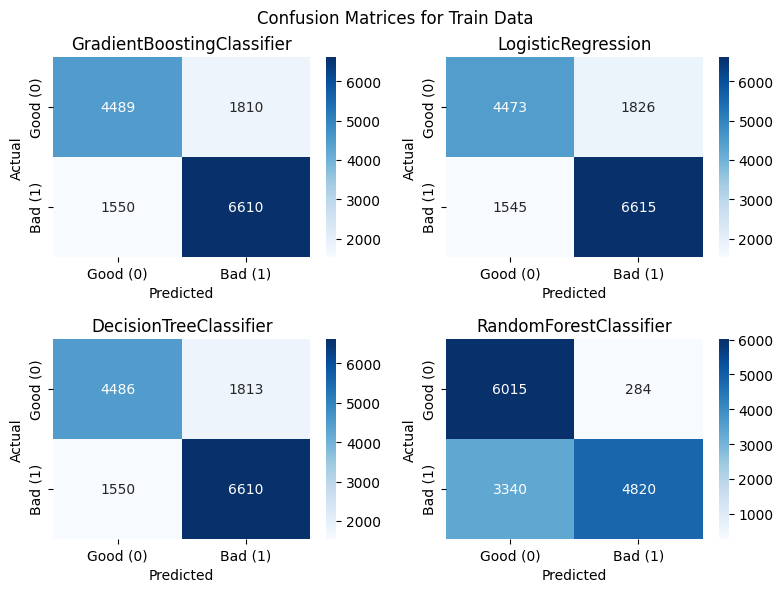

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

    # Plot the confusion matrix on the given axis
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'], ax=ax)
    ax.set_ylabel('Actual')                                              
    ax.set_xlabel('Predicted')
    ax.set_title(f'{model_name}')

# Setup a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Confusion Matrices for Train Data', fontsize=12)

# List of axes and model names
ax_list = axes.flatten()
model_names = list(predictions_train.keys())

# Plot confusion matrices for test data on the 2x2 grid
for ax, model_name in zip(ax_list, model_names):
    plot_confusion_matrix(ax, Ytrain, predictions_train[model_name], model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


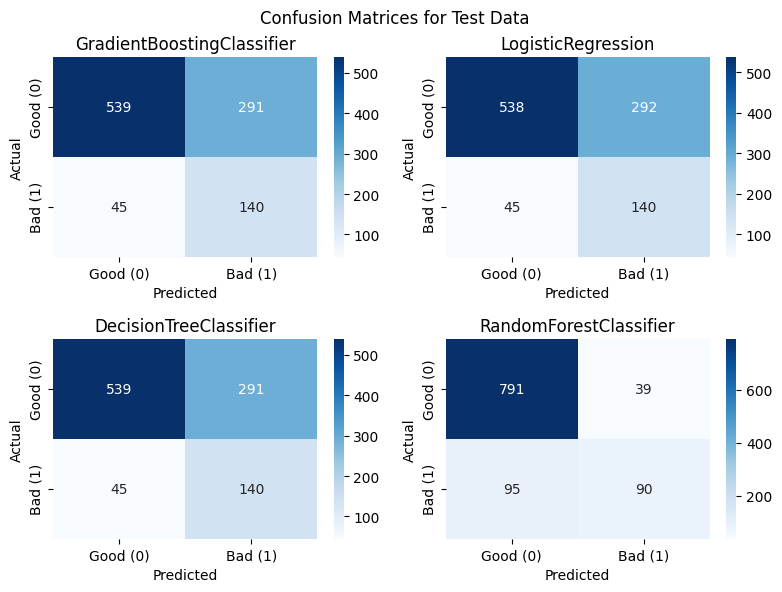

In [17]:
# Setup a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Confusion Matrices for Test Data', fontsize=12)

# List of axes and model names
ax_list = axes.flatten()
model_names = list(predictions_test.keys())

# Plot confusion matrices for test data on the 2x2 grid
for ax, model_name in zip(ax_list, model_names):
    plot_confusion_matrix(ax, Ytest, predictions_test[model_name], model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

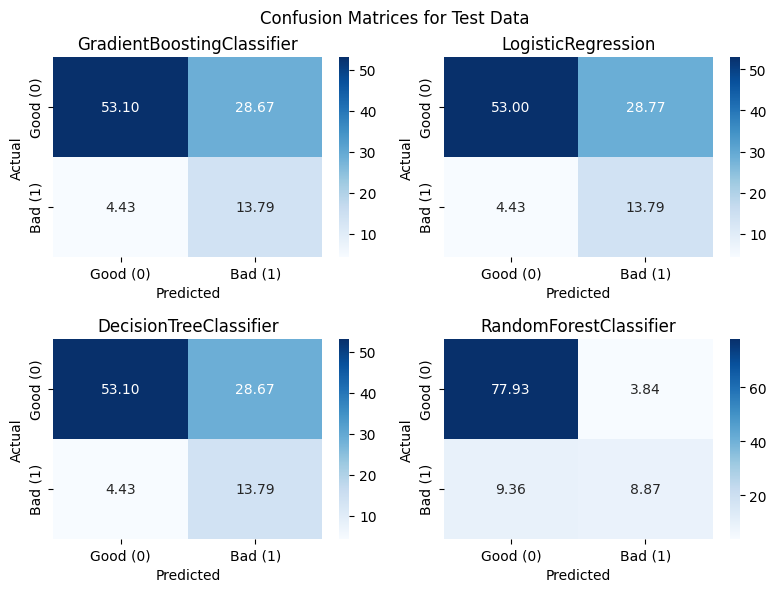

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    
    # Convert matrix to percentages of the total input
    cm_percentage = (cm / cm.sum()) * 100

    # Plot the confusion matrix on the given axis
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'], ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'{model_name}')

# Setup a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Confusion Matrices for Test Data', fontsize=12)

# Assuming predictions_validation is a dictionary with model names as keys and predicted values as values
# List of axes and model names
ax_list = axes.flatten()
model_names = list(predictions_test.keys())

# Plot confusion matrices for test data on the 2x2 grid
for ax, model_name in zip(ax_list, model_names):
    plot_confusion_matrix(ax, Ytest, predictions_test[model_name], model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


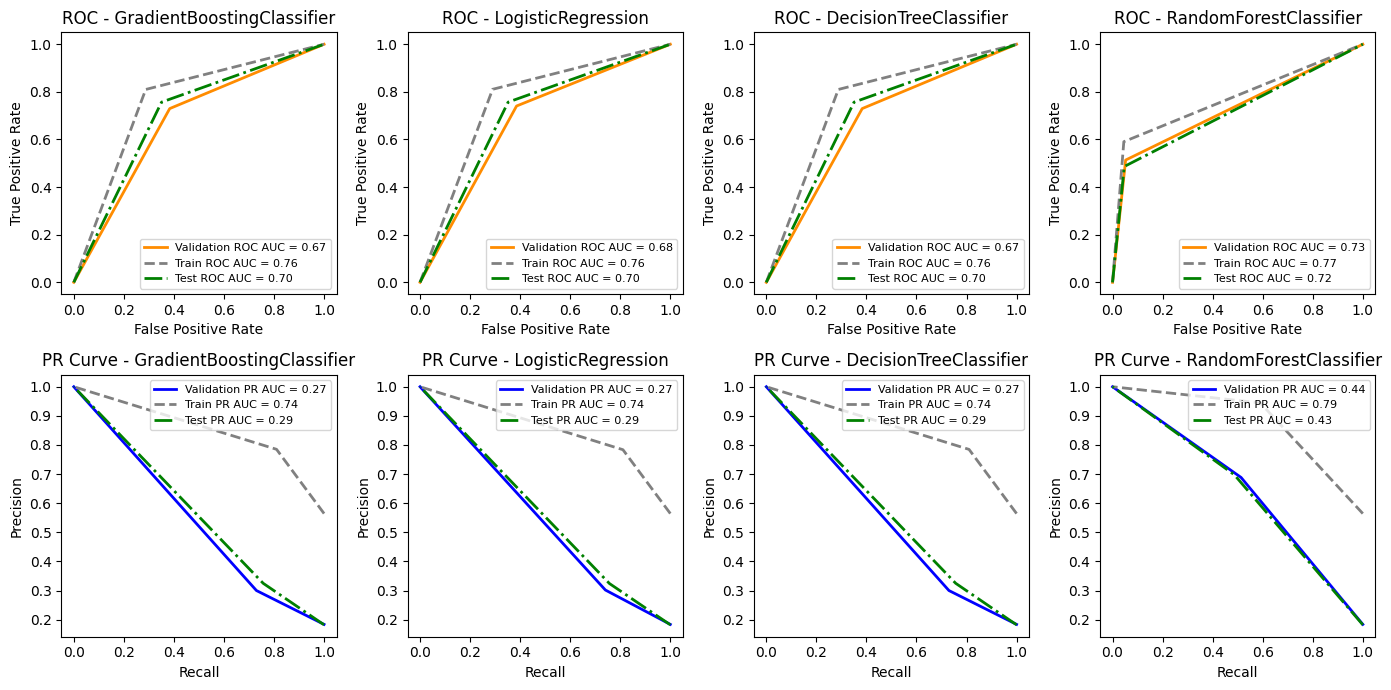

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

def plot_curves(y_true_Validation, y_probs_Validation, y_true_train, y_probs_train, y_true_test, y_probs_test, model_name):
    # Validation ROC values
    fpr_Validation, tpr_Validation, _ = roc_curve(y_true_Validation, y_probs_Validation)
    roc_auc_Validation = auc(fpr_Validation, tpr_Validation)
    
    # Train ROC values
    fpr_train, tpr_train, _ = roc_curve(y_true_train, y_probs_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Test ROC values
    fpr_test, tpr_test, _ = roc_curve(y_true_test, y_probs_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Validation PR values
    precision_Validation, recall_Validation, _ = precision_recall_curve(y_true_Validation, y_probs_Validation)
    pr_auc_Validation = average_precision_score(y_true_Validation, y_probs_Validation)

    # Train PR values
    precision_train, recall_train, _ = precision_recall_curve(y_true_train, y_probs_train)
    pr_auc_train = average_precision_score(y_true_train, y_probs_train)

    # Test PR values
    precision_test, recall_test, _ = precision_recall_curve(y_true_test, y_probs_test)
    pr_auc_test = average_precision_score(y_true_test, y_probs_test)

    # ROC Curve
    plt.subplot(2, 4, list(predictions_validation.keys()).index(model_name) + 1)
    plt.plot(fpr_Validation, tpr_Validation, color='darkorange', lw=2, label=f'Validation ROC AUC = {roc_auc_Validation:.2f}')
    plt.plot(fpr_train, tpr_train, color='gray', lw=2, linestyle='--', label=f'Train ROC AUC = {roc_auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, color='green', lw=2, linestyle='-.', label=f'Test ROC AUC = {roc_auc_test:.2f}')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'ROC - {model_name}', fontsize=12)
    plt.legend(loc="lower right", fontsize=8)

    # PR Curve
    plt.subplot(2, 4, list(predictions_validation.keys()).index(model_name) + 5)
    plt.plot(recall_Validation, precision_Validation, color='blue', lw=2, label=f'Validation PR AUC = {pr_auc_Validation:.2f}')
    plt.plot(recall_train, precision_train, color='gray', lw=2, linestyle='--', label=f'Train PR AUC = {pr_auc_train:.2f}')
    plt.plot(recall_test, precision_test, color='green', lw=2, linestyle='-.', label=f'Test PR AUC = {pr_auc_test:.2f}')
    plt.xlabel('Recall', fontsize=10)
    plt.ylabel('Precision', fontsize=10)
    plt.title(f'PR Curve - {model_name}', fontsize=12)
    plt.legend(loc="upper right", fontsize=8)

plt.figure(figsize=(14, 7))
for model_name in predictions_validation.keys():
    # Assuming the model returns the probability of the positive class for Validation, train, and test
    plot_curves(Yval, predictions_validation[model_name], Ytrain, predictions_train[model_name], Ytest, predictions_test[model_name], model_name)

plt.tight_layout()
plt.show()


In [20]:
binsV = [0, 0.28, 0.36, 0.46, 0.58, 0.71, 1]


#binsV = [0, 0.33, 0.40, 0.48, 0.59, 1]
# RandomForestClassifier
# LogisticRegression

modelT = 'LogisticRegression'

# For LogisticRegression
lg_probas_Train = models[modelT].predict_proba(Xtrain)
lg_default_probs_Train = lg_probas_Train[:, 1] # Probabilities of default

train_upsampled_re = train_upsampled.copy()


train_upsampled_re['Probability_model'] = pd.DataFrame(lg_default_probs_Train)
pn1 = train_upsampled_re['Probability_model']
# Before upsampling so its relative to the risk the model trained on 

train_upsampled_re['Probability_Bins'] = pd.cut(train_upsampled_re['Probability_model'], bins=binsV, labels=False)



# For LogisticRegression
lg_probas = models[modelT].predict_proba(Xval)
lg_default_probs_Val = lg_probas[:, 1] # Probabilities of default

val_re = val.copy()
val_re['Probability_model'] = lg_default_probs_Val
pn2 = val_re['Probability_model']

# Before upsampling so its relative to the risk the model trained on 
#test_re['Probability_Bins'] = pd.cut(test_re['Probability_model'], bins=4, labels=False)
val_re['Probability_Bins'] = pd.cut(val_re['Probability_model'], bins=binsV, labels=False)
#
# 
# val_re['YearMonth'] = val_re['ReceivedDate'].dt.to_period('M')



# For LogisticRegression
lg_probas = models[modelT].predict_proba(Xtest)
lg_default_probs_Test = lg_probas[:, 1] # Probabilities of default

test_re = test.copy()
test_re['Probability_model'] = lg_default_probs_Test
pn3= test_re['Probability_model'] 

# Before upsampling so its relative to the risk the model trained on 
#test_re['Probability_Bins'] = pd.cut(test_re['Probability_model'], bins=4, labels=False)
test_re['Probability_Bins'] = pd.cut(test_re['Probability_model'], bins=binsV, labels=False)

#test_re['YearMonth'] = test_re['ReceivedDate'].dt.to_period('M')

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_upsampled_re and test_re dataframes are already loaded


def plotScoreDist(train_upsampled_re,val_re,test_re,feature):
    # Create masks for each category
    category1_train = train_upsampled_re[train_upsampled_re['Ever90_12M'] == 0]
    category2_train = train_upsampled_re[train_upsampled_re['Ever90_12M'] == 1]
    category1_val = val_re[val_re['Ever90_12M'] == 0]
    category2_val = val_re[val_re['Ever90_12M'] == 1]
    category1_test = test_re[test_re['Ever90_12M'] == 0]
    category2_test = test_re[test_re['Ever90_12M'] == 1]

    # Create a figure and axis
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 2 columns

    # Plot histograms for train data
    axs[0].hist(category1_train[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 0', density=True)
    axs[0].hist(category2_train[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 1', density=True)
    axs[0].set_title('Train Default Probabilities Hist')
    axs[0].set_xlabel('Probability of Default')
    axs[0].set_ylabel('Density')
    axs[0].legend(loc='upper right')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for test data
    axs[1].hist(category1_val[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 0', density=True)
    axs[1].hist(category2_val[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 1', density=True)
    axs[1].set_title('Validation Default Probabilities Hist')
    axs[1].set_xlabel('Probability of Default')
    axs[1].set_ylabel('Density')
    axs[1].legend(loc='upper right')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for test data
    axs[2].hist(category1_test[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 0', density=True)
    axs[2].hist(category2_test[feature], bins=30, edgecolor='k', alpha=0.5, label='Ever90_12M = 1', density=True)
    axs[2].set_title('Test Default Probabilities Hist')
    axs[2].set_xlabel('Probability of Default')
    axs[2].set_ylabel('Density')
    axs[2].legend(loc='upper right')
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()

    #print(f"Mean Probability for Train Data: {np.mean(train_upsampled_re[feature])}")
    #print(f"Mean Probability for Test Data: {np.mean(test_re[feature])}")


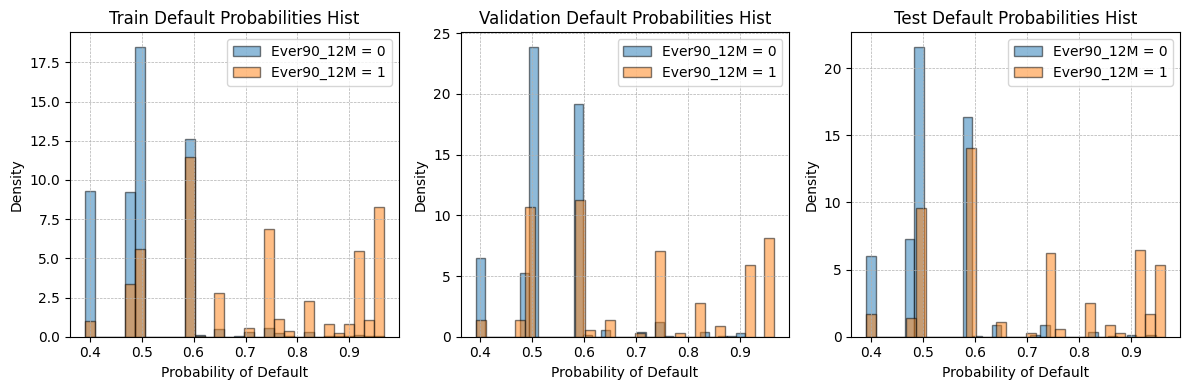

In [22]:
plotScoreDist(train_upsampled_re,val_re,test_re,'Probability_model')

In [23]:
train_upsampled_re.sort_values(by='Probability_model').head(50)

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth,Probability_model,Probability_Bins
4481,7240492,2022-01-31,2021-03-12,1,0,0,0,1.484099,0,NaT,0.390768,2
1180,5576863,2022-03-31,2019-01-30,1,0,0,0,NaN,0,NaT,0.390768,2
3113,7175805,2022-06-30,2020-07-02,1,0,0,0,NaN,0,NaT,0.390768,2
11293,7212673,2021-11-30,2020-11-23 00:00:00,1,0,0,0,1.484099,1,2020-11,0.390768,2
1171,5573100,2020-02-29,2019-01-25,1,0,0,0,1.877308,0,NaT,0.390768,2
1168,5572318,2021-08-31,2019-01-25,1,0,0,0,NaN,0,NaT,0.390768,2
3126,7176340,2022-11-30,2019-06-19,1,0,0,0,1.484099,0,NaT,0.390768,2
1166,5571658,2021-03-31,2019-01-25,1,0,0,0,NaN,0,NaT,0.390768,2
1165,5571476,2021-01-31,2019-03-14,1,0,0,0,NaN,0,NaT,0.390768,2
11308,7192420,2021-04-30,2020-11-10 00:00:00,1,0,0,0,1.484099,1,2020-11,0.390768,2


## 

In [24]:



# # Read the CSV file.
df = pd.read_csv('BSC_raw.csv', skiprows=0)

pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])


ttt = df.copy()

ttt[ttt.Score.isna() =='False' ]
ttt.dropna(inplace=True)

ttt
# #########################
# #df = toKeep.copy()

quartile1 = 0.7 
quartile2 = 0.85 
 

position1 = from_quartile_idx(ttt,quartile1,'Ever90_12M')
position2 = from_quartile_idx(ttt,quartile2,'Ever90_12M')



5109
6011


In [25]:
ttt[ttt.Score > -1]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,Score,Ever90_12M
3840,5027669,2021-10-31,38,2018-08-16,0.0,0.0,0,0,0,0,0,0,0.028300,1,1,1,4.595843,0
8252,5043005,2021-02-28,37,2018-01-29,389.0,517.0,0,0,1,0,0,1,0.152784,1,1,3,1.877308,0
826,5049333,2021-02-28,36,2018-02-13,0.0,0.0,0,0,0,0,0,0,0.097448,1,1,1,1.877308,0
1554,5051966,2019-05-31,9,2018-08-02,0.0,0.0,0,0,0,0,0,0,0.042931,1,1,1,1.877308,0
2488,5055215,2020-06-30,27,2018-03-29,0.0,0.0,0,0,0,0,0,0,0.040189,1,1,1,1.877308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,7772361,2022-10-31,4,2022-06-30,0.0,0.0,0,0,0,0,0,0,0.076323,1,1,1,4.595843,0
1761,7772395,2022-09-30,3,2022-06-30,0.0,0.0,0,0,0,0,0,0,0.027863,1,1,1,1.877308,0
1875,7772825,2022-10-31,4,2022-06-30,0.0,0.0,0,0,0,0,0,0,0.122270,0,0,0,3.654435,1
1912,7772924,2022-10-31,3,2022-07-01,0.0,0.0,0,0,0,0,0,0,0.039616,0,0,0,3.654435,0


In [26]:


ttt =  ttt[['Ever90_12M','Score']]


ttt


# Split the data
otrain, otest , oval = ttt.iloc[:position1], ttt.iloc[position1:position2] ,ttt.iloc[position2:]

otoPlotPDtrain = otrain.copy()
otoPlotPDval = oval.copy()
otoPlotPDtest = otest.copy()


print(len(otoPlotPDtrain))
print(len(otoPlotPDval))
print(len(otoPlotPDtest))


5109
1029
902


In [27]:
otoPlotPDval

,Ever90_12M,Score
6942,1,27.662599
7001,0,4.595843
7011,0,3.654435
7022,0,3.654435
7041,0,4.595843
...,...,...
1750,0,4.595843
1761,0,1.877308
1875,1,3.654435
1912,0,3.654435


0.8253692556472105
0.7309504604422935
0.7668466590880385


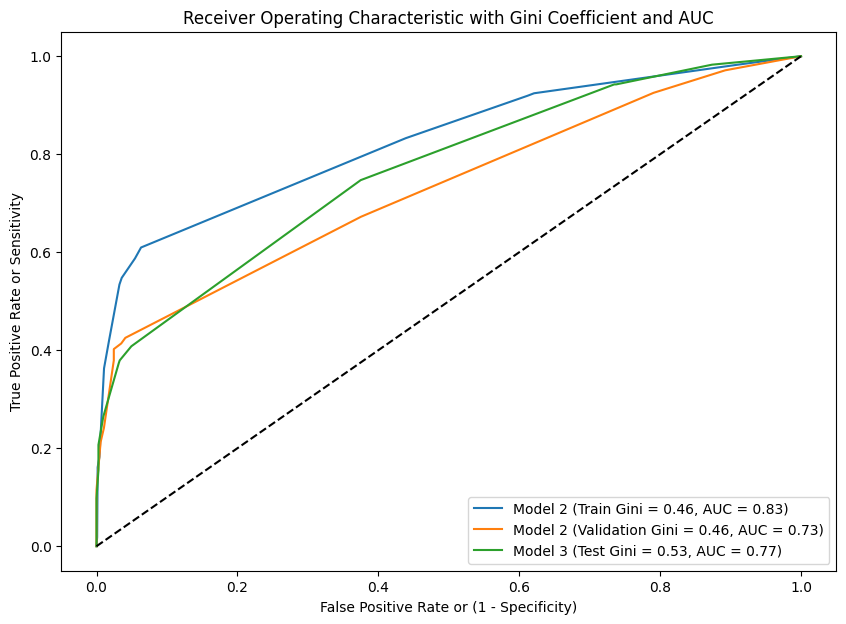

0.5229466506658103


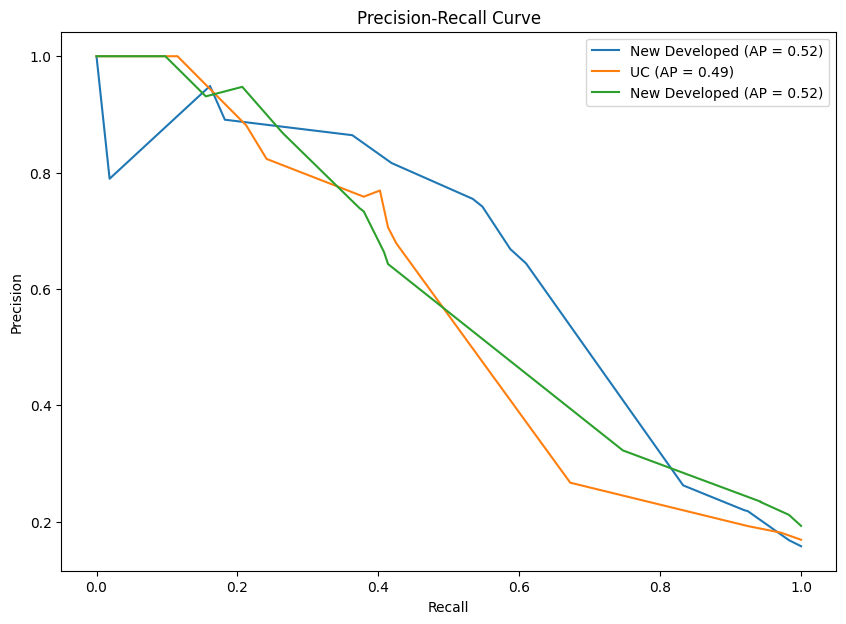

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

model__ = 'Score'

# Assuming y_true, pd_values_model1, pd_values_model2, and pd_values_model3 are already defined...

# Calculate AUC and Gini for Model 2
fpr1, tpr1, thresholds1 = roc_curve(otoPlotPDtrain['Ever90_12M'].astype(float), otoPlotPDtrain[model__])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)
gini1 = 2 * roc_auc1 - 1

# Calculate AUC and Gini for Model 2
fpr2, tpr2, thresholds2 = roc_curve(otoPlotPDval['Ever90_12M'], otoPlotPDval[model__])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)
gini2 = 2 * roc_auc2 - 1

# Calculate AUC and Gini for Model 3
fpr3, tpr3, thresholds3 = roc_curve(otoPlotPDtest['Ever90_12M'], otoPlotPDtest[model__])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)
gini3 = 2 * roc_auc3 - 1

# Plotting ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label=f'Model 2 (Train Gini = {gini2:.2f}, AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (Validation Gini = {gini2:.2f}, AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (Test Gini = {gini3:.2f}, AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or Sensitivity')
plt.title('Receiver Operating Characteristic with Gini Coefficient and AUC')
plt.legend(loc="lower right")



plt.show()




from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# For Model 1
precision1, recall1, thresholds1 = precision_recall_curve(otoPlotPDtrain['Ever90_12M'], otoPlotPDtrain[model__])
avg_prec1 = average_precision_score(otoPlotPDtrain['Ever90_12M'], otoPlotPDtrain['Score'])

# For Model 2
precision2, recall2, thresholds2 = precision_recall_curve(otoPlotPDval['Ever90_12M'], otoPlotPDval[model__])
avg_prec2 = average_precision_score(otoPlotPDval['Ever90_12M'], otoPlotPDval['Score'])

# For Model 3
precision3, recall3, thresholds3 = precision_recall_curve(otoPlotPDtest['Ever90_12M'], otoPlotPDtest[model__])
avg_prec3 = average_precision_score(otoPlotPDtest['Ever90_12M'], otoPlotPDtest[model__])
print(avg_prec3)

# Plotting PR curves
plt.figure(figsize=(10, 7))
plt.plot(recall1, precision1, label=f'New Developed (AP = {avg_prec3:.2f})')
plt.plot(recall2, precision2, label=f'UC (AP = {avg_prec2:.2f})')
plt.plot(recall3, precision3, label=f'New Developed (AP = {avg_prec3:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


0.8420098292134762
0.7759255605970935
0.7869944643438619


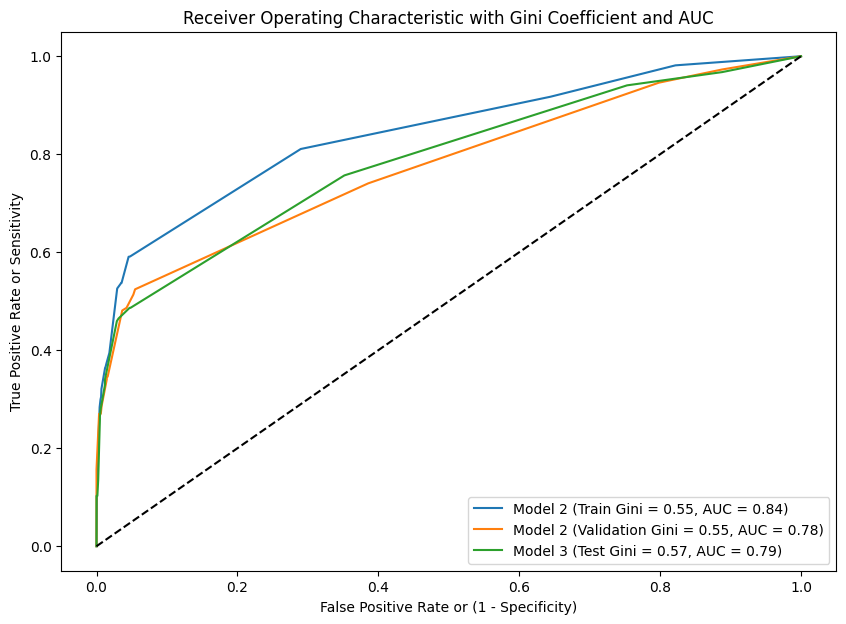

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_true, pd_values_model1, pd_values_model2, and pd_values_model3 are already defined...

# Calculate AUC and Gini for Model 2
fpr1, tpr1, thresholds1 = roc_curve(train_upsampled_re['Ever90_12M'].astype(float), train_upsampled_re['Probability_model'])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)
gini1 = 2 * roc_auc1 - 1

# Calculate AUC and Gini for Model 2
fpr2, tpr2, thresholds2 = roc_curve(val_re['Ever90_12M'], val_re['Probability_model'])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)
gini2 = 2 * roc_auc2 - 1

# Calculate AUC and Gini for Model 3
fpr3, tpr3, thresholds3 = roc_curve(test_re['Ever90_12M'], test_re['Probability_model'])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)
gini3 = 2 * roc_auc3 - 1

# Plotting ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label=f'Model 2 (Train Gini = {gini2:.2f}, AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (Validation Gini = {gini2:.2f}, AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (Test Gini = {gini3:.2f}, AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or Sensitivity')
plt.title('Receiver Operating Characteristic with Gini Coefficient and AUC')
plt.legend(loc="lower right")



plt.show()


0.5691852129445083


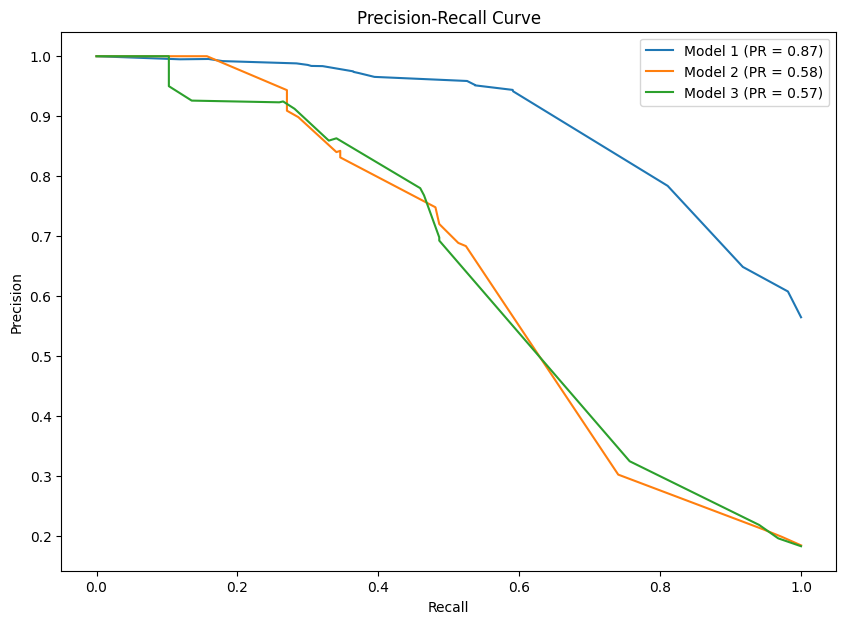

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# For Model 2
precision1, recall1, thresholds1 = precision_recall_curve(train_upsampled_re['Ever90_12M'].astype(float), train_upsampled_re['Probability_model'])
avg_prec1 = average_precision_score(train_upsampled_re['Ever90_12M'].astype(float), train_upsampled_re['Probability_model'])

# For Model 2
precision2, recall2, thresholds2 = precision_recall_curve(val_re['Ever90_12M'], val_re['Probability_model'])
avg_prec2 = average_precision_score(val_re['Ever90_12M'], val_re['Probability_model'])

# For Model 3
precision3, recall3, thresholds3 = precision_recall_curve(test_re['Ever90_12M'], test_re['Probability_model'])
avg_prec3 = average_precision_score(test_re['Ever90_12M'], test_re['Probability_model'])
print(avg_prec3)

# Plotting PR curves
plt.figure(figsize=(10, 7))
plt.plot(recall1, precision1, label=f'Model 1 (PR = {avg_prec1:.2f})')
plt.plot(recall2, precision2, label=f'Model 2 (PR = {avg_prec2:.2f})')
plt.plot(recall3, precision3, label=f'Model 3 (PR = {avg_prec3:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [31]:
#,val_re,test_re
#
#


In [32]:
train_upsampled_re

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth,Probability_model,Probability_Bins
0,5020169,2020-05-31,2018-05-29,0,0,0,0,NaN,0,NaT,0.500000,3
1,5027321,2018-10-31,2018-01-09,0,0,1,0,4.595843,0,NaT,0.587582,4
2,5027669,2022-06-30,2018-08-16,0,0,0,0,4.595843,0,NaT,0.500000,3
3,5028501,2022-07-31,2018-06-11,1,0,0,0,NaN,0,NaT,0.390768,2
4,5043005,2020-10-31,2018-01-29,1,0,1,0,3.126808,0,NaT,0.477488,3
...,...,...,...,...,...,...,...,...,...,...,...,...
14454,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12,0.587582,4
14455,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12,0.587582,4
14456,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12,0.587582,4
14457,7682578,2022-07-31,2021-12-06 00:00:00,0,0,1,0,4.595843,1,2021-12,0.587582,4


In [33]:
re_calibrate = pd.concat((train_upsampled_re,val_re,test_re)).drop_duplicates()

In [34]:
re_calibrate[['Probability_model','Ever90_12M']]

,Probability_model,Ever90_12M
0,0.500000,0
1,0.587582,0
2,0.500000,0
3,0.390768,0
4,0.477488,0
...,...,...
7687,0.587582,0
7695,0.500000,0
7699,0.477488,0
7704,0.500000,0


In [35]:
re_calibrate[re_calibrate.Probability_model.isna() ]

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth,Probability_model,Probability_Bins


In [36]:
re_calibrate['Ever90_12M'].value_counts()

Ever90_12M
0    7951
1    1230
Name: count, dtype: int64

In [148]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 're_calibrate' DataFrame with 'Probability_model' and 'Ever90_12M' columns is already defined

# Extract features and target variable
X = re_calibrate[['Probability_model']]
y = re_calibrate['Ever90_12M']

if y.dtype == 'object':
    y = y.astype(int)

# Sample weights based on your upsampling strategy
# Adjust the weight values according to your specific needs
weights = [0.395 if label == 1 else 1 for label in y]  # Assuming 1 is the minority (default) class

# Create the logistic regression model with sample weights for calibration
model = LogisticRegression()
model.fit(np.array(X), np.array(y), sample_weight=weights)

# Use the trained model to predict the recalibrated probabilities
recalibrated_probabilities = model.predict_proba(X)[:, 1]

# Add the recalibrated probabilities to the DataFrame
re_calibrate['Recalibrated_Probability_model'] = recalibrated_probabilities


/Users/andreasnilsson/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [149]:
stadie1 = re_calibrate[re_calibrate.Ever90_12M == 0 ]

print(np.mean(stadie1.Recalibrated_Probability_model) * (1 - calculated_cureRate))

0.04101413072689289


In [150]:

calculated_cureRate = 0.055


(1 + 0.041118483857453376 )/ (1 + np.mean(stadie1.Recalibrated_Probability_model) * (1 - calculated_cureRate))



1.0001002418002602

## innan sök denna när jag gångrar med Cure rate

stadie1 = re_calibrate[re_calibrate.Ever90_12M == 0 ]

np.mean(stadie1.Recalibrated_Probability_model)


0.041118483857453376

In [151]:
# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)

#  Ever30In6Months	Ever30	Ever60In6Months	WorstDelinquency6M

Coefficients: [[9.86439545]]
Intercept: [-8.53541797]


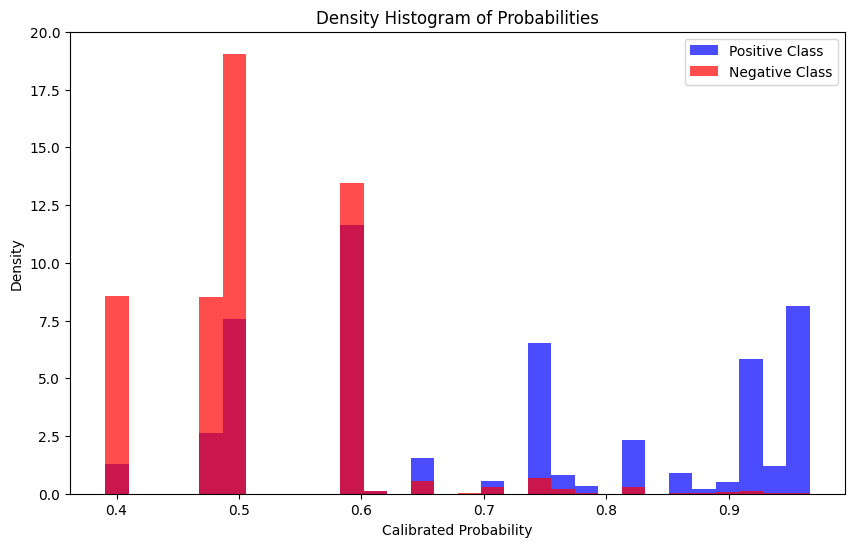

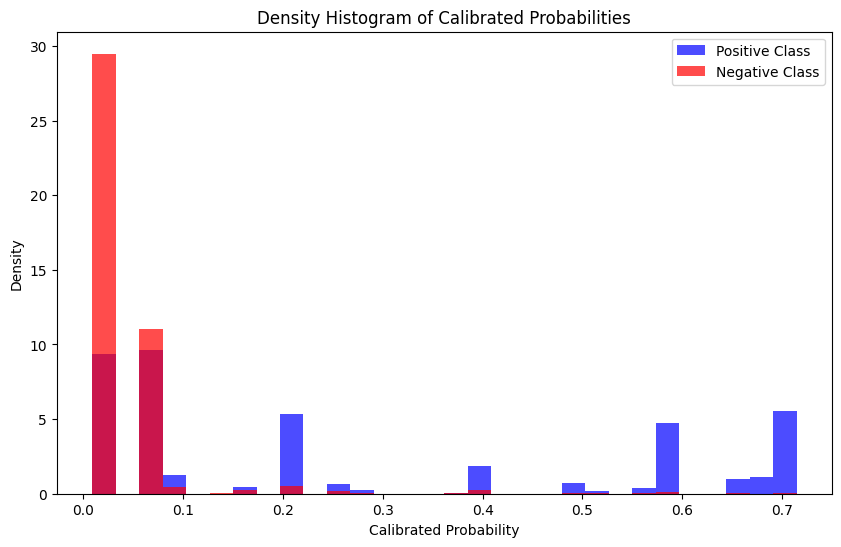

In [39]:
# Get the calibrated probabilities
calibrated_probabilities = re_calibrate['Probability_model']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[re_calibrate['Ever90_12M'] == 1]
negative_class = calibrated_probabilities[re_calibrate['Ever90_12M'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=30, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=30, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Probabilities')
plt.legend()
plt.show()



# Get the calibrated probabilities
calibrated_probabilities = re_calibrate['Recalibrated_Probability_model']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[re_calibrate['Ever90_12M'] == 1]
negative_class = calibrated_probabilities[re_calibrate['Ever90_12M'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=30, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=30, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Calibrated Probabilities')
plt.legend()
plt.show()


# Feature Coefficients

In [40]:
# Coefficients
print("Coefficients:", models['LogisticRegression'].coef_)

# Intercept
print("Intercept:", models['LogisticRegression'].intercept_)

#  CoappFlag	Ever30In6Months		WorstDelinquency6M	

Coefficients: [[-0.44408592  0.18776578  0.35397657  0.70176871]]
Intercept: [0.]


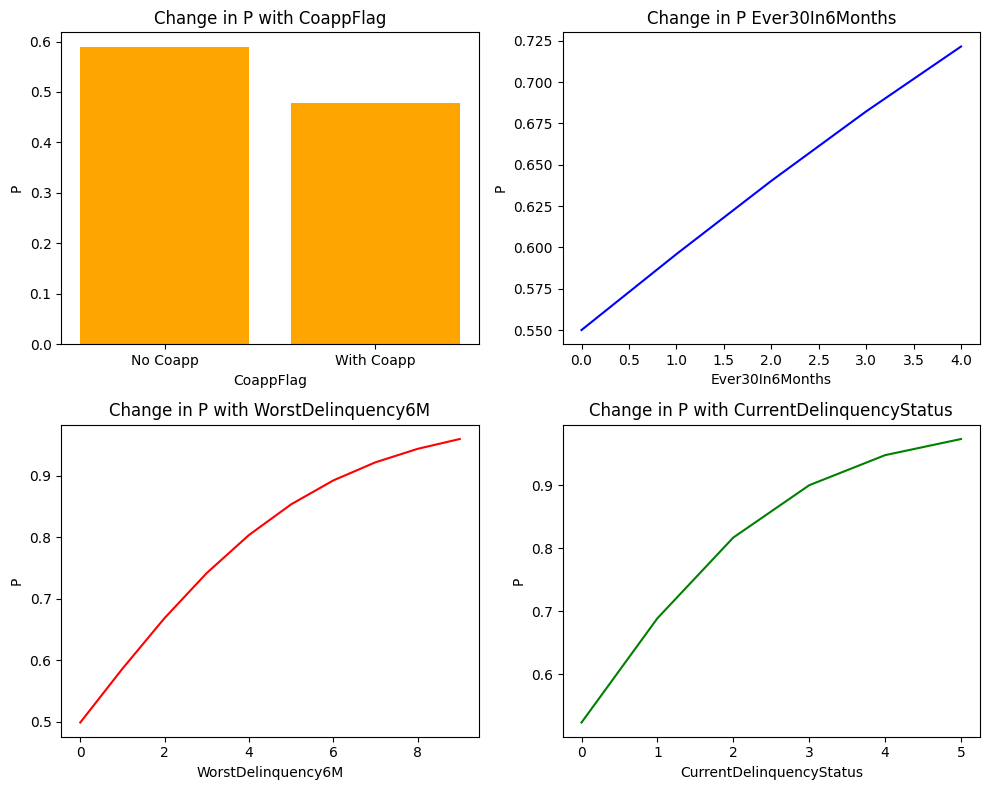

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = re_calibrate.copy()

# Coefficients and Intercept from the Logistic Regression model
coefficients = np.array(models['LogisticRegression'].coef_[0])  # Ensure this includes the coefficient for CurrentDelinquencyStatus
intercept = np.array(models['LogisticRegression'].intercept_)

# Update constants and ranges with CurrentDelinquencyStatus
constants = {
    'CoappFlag': df.CoappFlag.mean(),
    'Ever30In6Months': df.Ever30In6Months.mean(),
    'WorstDelinquency6M': df.WorstDelinquency6M.mean(),
    'CurrentDelinquencyStatus': df.CurrentDelinquencyStatus.mean(),  # New feature
}

ranges = {
    'CoappFlag': [i % 2 for i in range(100)],
    'Ever30In6Months': [int(i * max(df.Ever30In6Months) / 20) for i in range(100)],
    'WorstDelinquency6M': [int(i * max(df.WorstDelinquency6M) / 30) for i in range(100)],
    'CurrentDelinquencyStatus': [int(i * max(df.CurrentDelinquencyStatus) / 50) for i in range(100)],  # Define the range for this new feature
}

feature_order = ['CoappFlag', 'Ever30In6Months', 'WorstDelinquency6M', 'CurrentDelinquencyStatus']  # Include new feature

show_change_df = pd.DataFrame()
for feature in feature_order:
    show_change_df[feature] = ranges[feature]
    other_features = set(feature_order) - {feature}

    Z_constant = sum([constants[f] * coefficients[feature_order.index(f)] for f in other_features]) + intercept[0]
    Z = Z_constant + show_change_df[feature] * coefficients[feature_order.index(feature)]
    
    show_change_df['P_' + feature] = 1 / (1 + np.exp(-Z))



# Assuming show_change_df and other necessary variables are already defined

# 2x2 Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for CoappFlag
# Since CoappFlag is binary, a bar plot is used to show the change in probability for 0 and 1
coapp_values = [0, 1]
coapp_probs = [show_change_df.loc[show_change_df['CoappFlag'] == val, 'P_CoappFlag'].mean() for val in coapp_values]
axes[0, 0].bar(coapp_values, coapp_probs, color='orange', tick_label=['No Coapp', 'With Coapp'])
axes[0, 0].set_title('Change in P with CoappFlag')
axes[0, 0].set_xlabel('CoappFlag')
axes[0, 0].set_ylabel('P')

# Plot for Ever30In6Months
axes[0, 1].plot(show_change_df['Ever30In6Months'], show_change_df['P_Ever30In6Months'], color='blue')
axes[0, 1].set_title('Change in P Ever30In6Months')
axes[0, 1].set_xlabel('Ever30In6Months')
axes[0, 1].set_ylabel('P')

# Plot for WorstDelinquency6M
axes[1, 0].plot(show_change_df['WorstDelinquency6M'], show_change_df['P_WorstDelinquency6M'], color='red')
axes[1, 0].set_title('Change in P with WorstDelinquency6M')
axes[1, 0].set_xlabel('WorstDelinquency6M')
axes[1, 0].set_ylabel('P')

# Plot for WorstDelinquency6M
axes[1, 1].plot(show_change_df['CurrentDelinquencyStatus'], show_change_df['P_CurrentDelinquencyStatus'], color='Green')
axes[1, 1].set_title('Change in P with CurrentDelinquencyStatus')
axes[1, 1].set_xlabel('CurrentDelinquencyStatus')
axes[1, 1].set_ylabel('P')

plt.tight_layout()
plt.show()


In [171]:
see = re_calibrate.sort_values('Recalibrated_Probability_model')

In [172]:
see[see.CoappFlag == 1].tail(100) 

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth,Probability_model,Probability_Bins,Recalibrated_Probability_model
11765,7220791,2022-06-30,2020-12-18 00:00:00,1,1,2,1,20.396739,1,2020-12,0.760121,5,0.332803
264,5244181,2019-03-31,2018-05-04,1,1,2,1,20.396739,0,NaT,0.760121,5,0.332803
2554,7142615,2022-01-31,2020-03-11,1,1,2,1,20.396739,0,NaT,0.760121,5,0.332803
2073,7113426,2022-07-31,2019-12-06,1,1,2,1,20.396739,0,NaT,0.760121,5,0.332803
13611,7396997,2022-12-31,2019-08-08 00:00:00,1,1,2,1,20.396739,1,2019-08,0.760121,5,0.332803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,5445333,2020-06-30,2018-11-29 00:00:00,1,1,3,3,64.500000,1,2018-11,0.948381,5,0.767361
7157,5299193,2020-01-31,2018-06-26 00:00:00,1,1,3,3,64.500000,1,2018-06,0.948381,5,0.767361
10554,7161383,2020-09-30,2020-05-25 00:00:00,1,1,3,3,64.500000,1,2020-05,0.948381,5,0.767361
13616,7426760,2022-05-31,2019-08-20 00:00:00,1,1,3,3,64.500000,1,2019-08,0.948381,5,0.767361


In [161]:
see[see.CoappFlag == 0].tail(100) 

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth,Probability_model,Probability_Bins,Recalibrated_Probability_model
6470,5069117,2018-04-30,2018-01-04 00:00:00,0,1,3,3,64.50,1,2018-01,0.966268,5,0.780033
3846,7213564,2021-10-31,2020-11-18,0,1,3,3,64.50,0,NaT,0.966268,5,0.780033
13974,7683618,2022-12-31,2021-10-26 00:00:00,0,1,3,3,92.65,1,2021-10,0.966268,5,0.780033
13971,7682875,2022-11-30,2021-10-22 00:00:00,0,1,3,3,92.65,1,2021-10,0.966268,5,0.780033
6644,5204540,2020-01-31,2018-02-23 00:00:00,0,1,3,3,64.50,1,2018-02,0.966268,5,0.780033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13443,7292840,2022-04-30,2021-09-08 00:00:00,0,1,3,3,64.50,1,2021-09,0.966268,5,0.780033
13444,7292865,2022-04-30,2021-09-08 00:00:00,0,1,3,3,64.50,1,2021-09,0.966268,5,0.780033
11748,7217581,2022-05-31,2020-12-03 00:00:00,0,1,3,3,64.50,1,2020-12,0.966268,5,0.780033
11059,7173834,2021-12-31,2020-09-02 00:00:00,0,1,3,3,64.50,1,2020-09,0.966268,5,0.780033


In [162]:
re_calibrate

,AccountNumber,SnapshotDate,DisbursedDate,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Score,Ever90_12M,YearMonth,Probability_model,Probability_Bins,Recalibrated_Probability_model
0,5020169,2020-05-31,2018-05-29,0,0,0,0,NaN,0,NaT,0.500000,3,0.032543
1,5027321,2018-10-31,2018-01-09,0,0,1,0,4.595843,0,NaT,0.587575,4,0.074657
2,5027669,2022-06-30,2018-08-16,0,0,0,0,4.595843,0,NaT,0.500000,3,0.032543
3,5028501,2022-07-31,2018-06-11,1,0,0,0,NaN,0,NaT,0.390758,2,0.011168
4,5043005,2020-10-31,2018-01-29,1,0,1,0,3.126808,0,NaT,0.477471,3,0.026156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,7727993,2022-10-31,2022-03-09,0,0,1,0,4.595843,0,NaT,0.587575,4,0.074657
7695,7728025,2022-11-30,2022-03-07,0,0,0,0,3.654435,0,NaT,0.500000,3,0.032543
7699,7728033,2022-06-30,2022-03-11,1,0,1,0,1.877308,0,NaT,0.477471,3,0.026156
7704,7728041,2022-08-31,2022-03-08,0,0,0,0,3.654435,0,NaT,0.500000,3,0.032543


0.8227992490590231


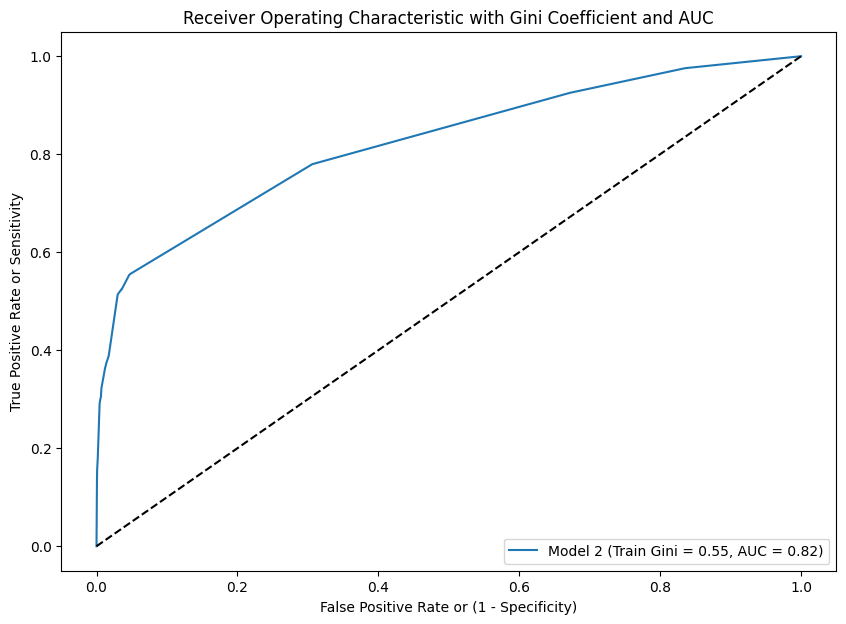

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_true, pd_values_model1, pd_values_model2, and pd_values_model3 are already defined...

# Calculate AUC and Gini for Model 2
fpr1, tpr1, thresholds1 = roc_curve(re_calibrate['Ever90_12M'].astype(float), re_calibrate['Recalibrated_Probability_model'])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)
gini1 = 2 * roc_auc1 - 1

# # Calculate AUC and Gini for Model 2
# fpr2, tpr2, thresholds2 = roc_curve(val_re['Ever90_12M'], val_re['Probability_model'])
# roc_auc2 = auc(fpr2, tpr2)
# print(roc_auc2)
# gini2 = 2 * roc_auc2 - 1

# # Calculate AUC and Gini for Model 3
# fpr3, tpr3, thresholds3 = roc_curve(test_re['Ever90_12M'], test_re['Probability_model'])
# roc_auc3 = auc(fpr3, tpr3)
# print(roc_auc3)
# gini3 = 2 * roc_auc3 - 1

# Plotting ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label=f'Model 2 (Train Gini = {gini2:.2f}, AUC = {roc_auc1:.2f})')
# plt.plot(fpr2, tpr2, label=f'Model 2 (Validation Gini = {gini2:.2f}, AUC = {roc_auc2:.2f})')
# plt.plot(fpr3, tpr3, label=f'Model 3 (Test Gini = {gini3:.2f}, AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or Sensitivity')
plt.title('Receiver Operating Characteristic with Gini Coefficient and AUC')
plt.legend(loc="lower right")



plt.show()


In [164]:
quartile1 = 0.7 
quartile2 = 0.85 
 

position1 = from_quartile_idx(df,quartile1,'Ever90_12M')
position2 = from_quartile_idx(df,quartile2,'Ever90_12M')



# Split the data
train, test , val = df.iloc[:position1], df.iloc[position1:position2] ,df.iloc[position2:]


7159
8166


,val_re,test_re

In [165]:
## 

# Hyperparameter Tunning

In [57]:
from GridLib import GridSearchCustom
from sklearn.linear_model import LogisticRegression

# Grids for Logistic Regression

# param_grids = [
#     {
#         'penalty': ['l1'],
#         'C': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#         'solver': ['liblinear', 'saga'],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False]
#     },
#     {
#         'penalty': ['l2'],

#         'C': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False],
#         'max_iter': [10000000]
#     },
#     {
#         'penalty': ['elasticnet'],
#         'C': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#         'solver': ['saga'],
#         'l1_ratio': [0.025, 0.05, 0.075, 0.1, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.925, 0.95, 0.975],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False],
#         'max_iter': [10000000]
#     },
#     {
#         'penalty': ['none'],
#         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#         'fit_intercept': [True, False],
#         'warm_start': [True, False],
#         'max_iter': [10000000]
#     }
# ]


reduced_C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


param_grids = [
    {
        'penalty': ['l1'],
        'C': reduced_C,
        'solver': ['liblinear', 'saga'],
        'fit_intercept': [True, False],
        'warm_start': [True, False]
    },
    {
        'penalty': ['l2'],
        'C': reduced_C,
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'fit_intercept': [True, False],
        'warm_start': [True, False],
        'max_iter': [10000000]
    },
    {
        'penalty': ['elasticnet'],
        'C': reduced_C,
        'solver': ['saga'],
        'l1_ratio': [0.025, 0.05, 0.075, 0.1, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.925, 0.95, 0.975],
        'fit_intercept': [True, False],
        'warm_start': [True, False],
        'max_iter': [10000000]
    },
    {
        'penalty': ['none'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'fit_intercept': [True, False],
        'warm_start': [True, False],
        'max_iter': [10000000]
    }
]



all_results = []  # Store results from all grids here
all_best_lists = []  # Store best lists from all grids here
all_best_params = []  # Store best params from all grids here

for idx, param_grid in enumerate(param_grids, 1):
    gsc = GridSearchCustom(LogisticRegression, param_grid)
    gsc.fit(Xtrain, Ytrain, Xval, Yval)
    
    # Get All results
    results = gsc.to_dataframe()
    all_results.append(results)

    # Save winning
    bestlist, best_params = gsc.filter_by_precision()
    
    all_best_lists.append(bestlist)
    all_best_params.append(best_params)

# Now, you can access all the results, best lists, and best parameters across all grids from the lists: `all_results`, `all_best_lists`, and `all_best_params` respectively.


/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andreasnilsson/anaconda3

In [63]:
all_best_lists[1].tail(30)

,penalty,C,solver,fit_intercept,warm_start,max_iter,train_accuracy,train_precision,train_recall,train_f1,test_accuracy,test_precision,test_recall,test_f1,metric_distance,objective
113,l2,1000.000,newton-cg,True,False,10000000,0.767411,0.784756,0.810049,0.797202,0.637537,0.300000,0.729730,0.425197,0.629837,0.467513
116,l2,1000.000,lbfgs,True,True,10000000,0.767411,0.784756,0.810049,0.797202,0.637537,0.300000,0.729730,0.425197,0.629837,0.467513
117,l2,1000.000,lbfgs,True,False,10000000,0.767411,0.784756,0.810049,0.797202,0.637537,0.300000,0.729730,0.425197,0.629837,0.467513
120,l2,1000.000,sag,True,True,10000000,0.767411,0.784756,0.810049,0.797202,0.637537,0.300000,0.729730,0.425197,0.629837,0.467513
121,l2,1000.000,sag,True,False,10000000,0.767411,0.784756,0.810049,0.797202,0.637537,0.300000,0.729730,0.425197,0.629837,0.467513
112,l2,1000.000,newton-cg,True,True,10000000,0.767411,0.784756,0.810049,0.797202,0.637537,0.300000,0.729730,0.425197,0.629837,0.467513
29,l2,0.001,saga,True,False,10000000,0.766858,0.783675,0.810662,0.796940,0.637537,0.301762,0.740541,0.428795,0.624028,0.576007
31,l2,0.001,saga,False,False,10000000,0.766858,0.783675,0.810662,0.796940,0.637537,0.301762,0.740541,0.428795,0.624028,0.576007
32,l2,0.010,newton-cg,True,True,10000000,0.766858,0.783675,0.810662,0.796940,0.637537,0.301762,0.740541,0.428795,0.624028,0.576007
33,l2,0.010,newton-cg,True,False,10000000,0.766858,0.783675,0.810662,0.796940,0.637537,0.301762,0.740541,0.428795,0.624028,0.576007


In [64]:
all_best_params[1]


{'penalty': 'l2',
 'C': 0.001,
 'solver': 'saga',
 'fit_intercept': False,
 'warm_start': True,
 'max_iter': 10000000}

# Random Forrest

In [80]:


# param_grid_random_forest_reduced = {
#     'n_estimators': [5, 7, 10,20, 50],  # Reduced options
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 4, 6, 8, 10],  # Fewer depths
#     'min_samples_split': [2, 5, 8],  # Reduced options
#     'min_samples_leaf': [1, 2,3,4, 6],  # Reduced options
#     'max_features': ['sqrt', 'log2', 0.5, 0.75],  # Reduced options
#     'max_leaf_nodes': [10, 30, 50, 70, 90],  # Fewer nodes
#     'min_impurity_decrease': [0.0, 0.02, 0.04],  # Reduced options
#     #'bootstrap': [True, False],
#     #'oob_score': [True, False],
#     #'n_jobs': [-1],
#     #'ccp_alpha': [0.0, 0.02, 0.04],  # Reduced options
#     #'class_weight': ['balanced']  # Just one option, adjust based on your dataset's needs
# }

expanded_focused_grid = {
    'n_estimators': [3, 4,5, 6,7, 10, 12],  # Broader around 5
    'criterion': ['gini' ],  # Added 'gini' for exploration        , 'entropy'
    'max_depth': [2, 3, 4, 5, 6],  # Broader around 4
    'min_samples_split': [3, 4, 5, 6, 7],  # Broader around 5
    'min_samples_leaf': [2, 3, 4, 5, 6],  # Broader around 4
    'max_features': ['log2'],  # Added 'log2' for exploration     'sqrt', 
    'max_leaf_nodes': [5, 8, 10, 12, 15],  # Broader around 10
    'min_impurity_decrease': [0.0, 0.01, 0.02]  # Slight variation
    #'bootstrap': [True],  # Assuming you might want to use bootstrap=True for RandomForest
    #'oob_score': [False, True]  # You can include both options or just keep one based on your previous results
}





# Using GridSearchCustom (as per your example)
gsc = GridSearchCustom(RandomForestClassifier, expanded_focused_grid)

## Fit 
gsc.fit(Xtrain, Ytrain, Xval, Yval)

## Get All results
results = gsc.to_dataframe()

## Save winning
bestlist, best_params = gsc.filter_by_precision()


In [81]:
bestlist

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,max_leaf_nodes,min_impurity_decrease,train_accuracy,train_precision,train_recall,train_f1,test_accuracy,test_precision,test_recall,test_f1,metric_distance,objective
4076,5,gini,2,7,3,log2,12,0.02,0.652582,0.938911,0.405882,0.566760,0.862500,0.744186,0.345946,0.472325,0.307398,0.488491
10421,10,gini,4,6,6,log2,12,0.02,0.652582,0.938911,0.405882,0.566760,0.862500,0.744186,0.345946,0.472325,0.307398,0.488491
4157,5,gini,3,3,4,log2,5,0.02,0.652582,0.938911,0.405882,0.566760,0.862500,0.744186,0.345946,0.472325,0.307398,0.488491
4127,5,gini,3,3,2,log2,5,0.02,0.652582,0.938911,0.405882,0.566760,0.862500,0.744186,0.345946,0.472325,0.307398,0.488491
4676,5,gini,4,5,3,log2,12,0.02,0.652582,0.938911,0.405882,0.566760,0.862500,0.744186,0.345946,0.472325,0.307398,0.488491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3,gini,2,7,6,log2,8,0.01,0.650830,0.956021,0.394493,0.558519,0.864423,0.761905,0.345946,0.475836,0.304132,0.500952
362,3,gini,2,7,6,log2,5,0.02,0.650830,0.956021,0.394493,0.558519,0.864423,0.761905,0.345946,0.475836,0.304132,0.500952
7222,6,gini,6,4,3,log2,10,0.01,0.650830,0.956021,0.394493,0.558519,0.864423,0.761905,0.345946,0.475836,0.304132,0.500952
2229,4,gini,2,7,5,log2,12,0.00,0.650830,0.956021,0.394493,0.558519,0.864423,0.761905,0.345946,0.475836,0.304132,0.500952


In [82]:
best_params

{'n_estimators': 4,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.01}

# Feature Importance


In [324]:
# from Preprocessing_Application import DataPreprocessor

# server = 'reporting-db.nystartfinans.net'
# database = 'reporting-db'
# username = 'Andreas'
# password = 'nCq8Sg@1lYnd(E'



# path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Behaviour-ScoreCard-DATA-223-/1. Data/1. BSD copy .sql"

# preprocessor = DataPreprocessor(server, database, username, password) 


# df = preprocessor.fetch_data_from_sql(path)

# df.to_csv('BSC_Today.csv', index=False)

In [191]:
max(df.SnapshotDate)

'2022-12-31'

In [2]:
df = pd.read_csv('BSC_Today.csv')

In [3]:
last =  df[df.SnapshotDate == '2023-12-31']

In [4]:
last

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,...,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
348,2023-12-31,1,5002274,CLOSED,0.0,89,2016-07-18,95,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,2023-12-31,1,5001227,CLOSED,0.0,93,2016-03-04,87,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,2023-12-31,1,5000336,CLOSED,0.0,98,2015-10-20,96,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,2023-12-31,1,5001060,CLOSED,0.0,94,2016-02-12,119,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,2023-12-31,1,5001748,CLOSED,0.0,91,2016-05-23,138,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684437,2023-12-31,1,7734130,CLOSED,0.0,21,2022-03-24,131,0,0,...,22.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
684444,2023-12-31,1,7740731,CLOSED,0.0,19,2022-05-11,167,1,0,...,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
684446,2023-12-31,1,7752819,CLOSED,0.0,19,2022-05-17,171,0,0,...,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
684462,2023-12-31,1,5542337,CLOSED,0.0,59,2019-01-22,72,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Add Admission Score

In [55]:
# # Read the CSV file.
AccountScore = pd.read_csv('NewScoreTape.csv', skiprows=0)
AccountScore =  AccountScore[['AccountNumber','P_calibrated']].drop_duplicates()

In [56]:
frame = pd.merge(last,AccountScore, on='AccountNumber')

In [57]:

frame = frame[['AccountNumber','SnapshotDate','DisbursedDate','Ever30In6Months','Ever30','Ever60In6Months',	'WorstDelinquency6M','CoappFlag','Ever90']]



In [58]:
# Create Xtrain, Ytrain, Xtest, Ytest
Xtrain, Ytrain = np.array(frame[['CoappFlag','Ever30In6Months','Ever30','Ever60In6Months','WorstDelinquency6M']]), np.ravel(frame['Ever90'].astype(float))

lg_probas_Train = models[modelT].predict_proba(Xtrain)
lg_default_probs_Train = lg_probas_Train[:, 1] # Probabilities of default


In [59]:
lg_default_probs_Train

array([0.99900239, 0.99777746, 0.27010246, ..., 0.99900239, 0.27010246,
       0.27010246])

In [60]:
frame['Probability_model'] = lg_default_probs_Train.astype(float)
frame

,AccountNumber,SnapshotDate,DisbursedDate,Ever30In6Months,Ever30,Ever60In6Months,WorstDelinquency6M,CoappFlag,Ever90,Probability_model
0,5055215,2023-12-31,2018-03-29,1,1,1,5,0,1,0.999002
1,5055215,2023-12-31,2018-03-29,1,1,1,5,1,1,0.997777
2,5071881,2023-12-31,2018-01-05,0,0,0,0,0,0,0.270102
3,5300306,2023-12-31,2018-07-06,0,0,0,0,1,0,0.142293
4,5300306,2023-12-31,2018-07-06,0,0,0,0,0,0,0.270102
...,...,...,...,...,...,...,...,...,...,...
16518,7728314,2023-12-31,2022-03-08,1,1,1,5,0,1,0.999002
16519,7734130,2023-12-31,2022-03-24,1,1,1,5,0,1,0.999002
16520,7752819,2023-12-31,2022-05-17,1,1,1,5,0,1,0.999002
16521,5542337,2023-12-31,2019-01-22,0,0,0,0,0,0,0.270102


In [61]:
import numpy as np

# Assuming frame['Probability_model'] is a pandas Series or similar
X = np.array(frame['Probability_model']).reshape(-1, 1)  # Reshape X to be 2D

# Now you can use the trained model to predict the recalibrated probabilities
recalibrated_probabilities = model.predict_proba(X)[:, 1]

# Add the recalibrated probabilities to the DataFrame
frame['Recalibrated_Probability_model'] = recalibrated_probabilities


# Coefficients
print("Coefficients:", model['LogisticRegression'].coef_)

# Intercept
print("Intercept:", model['LogisticRegression'].intercept_)

#  Ever30In6Months	Ever30	Ever60In6Months	WorstDelinquency6M

In [63]:
# Coefficients
print("Coefficients:", model['LogisticRegression'].coef_)

# Intercept
print("Intercept:", model['LogisticRegression'].intercept_)

#  Ever30In6Months	Ever30	Ever60In6Months	WorstDelinquency6M

TypeError: 'LogisticRegression' object is not subscriptable

In [216]:
frame['Recalibrated_Probability_model']

0        0.653828
1        0.652341
2        0.036587
3        0.018783
4        0.036587
           ...   
16518    0.653828
16519    0.653828
16520    0.653828
16521    0.036587
16522    0.036587
Name: Recalibrated_Probability_model, Length: 16523, dtype: float64

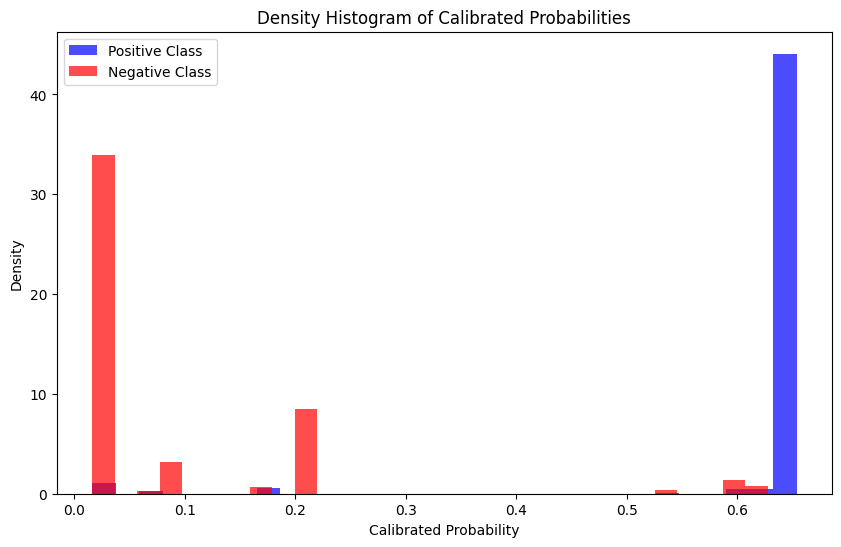

In [218]:
# Get the calibrated probabilities
calibrated_probabilities = frame['Recalibrated_Probability_model']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[frame['Ever90'] == 1]
negative_class = calibrated_probabilities[frame['Ever90'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=30, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=30, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Calibrated Probabilities')
plt.legend()
plt.show()


In [479]:
frame.to_excel('BHC.xlsx', index=False)

In [355]:
max(frame.Recalibrated_Probability_model)

0.7607014068370971

In [356]:
min(frame.Recalibrated_Probability_model)

0.0727558349888965

In [482]:
5337571

5337571

In [483]:
frame[frame.AccountNumber == 5337571]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,Ever30In6Months,Ever60In6Months,WorstDelinquency,Ever90,Uncalibrated
74,5337571,2023-06-30,58,2018-08-31,1,1,5,1,0.000046
75,5337571,2023-06-30,58,2018-08-31,1,1,5,1,0.000046


In [484]:
1-1.768456e-08

0.99999998231544

In [ ]:
nm,